In [3]:
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import statsmodels.api as sm
import pandas as pd

#create covid table contains all the confirmed cases in from the beginning until now:

df = pd.read_csv("../project2/20mar2020.csv")
df.head()

#drop redundant columns 
covid = df.drop(columns = ['Moyenne mobile (7 jours)', 'Annotations 1'])
covid
covid["Date de résultat du test"] = pd.to_datetime(covid["Date de résultat du test"])

covid

,Date de résultat du test,Cas confirmés,Day
0,2020-02-24,0,0
1,2020-02-25,0,1
2,2020-02-26,0,2
3,2020-02-27,0,3
4,2020-02-28,0,4
...,...,...,...
1041,2022-12-31,610,1041
1042,2023-01-01,453,1042
1043,2023-01-02,793,1043
1044,2023-01-03,935,1044


In [31]:
#create dataset for 1st lockdown in MAR2020:
start_date = "2020-02-24"
end_date = "2020-04-20"

data = (covid['Date de résultat du test'] >= start_date) & (covid['Date de résultat du test'] <= end_date)
mar = covid.loc[data].reset_index()
mar['Day']=mar.index
mar = mar.drop('index',axis=1)
mar

,Date de résultat du test,Cas confirmés,Day
0,2020-02-24,0,0
1,2020-02-25,0,1
2,2020-02-26,0,2
3,2020-02-27,0,3
4,2020-02-28,0,4
5,2020-02-29,0,5
6,2020-03-01,0,6
7,2020-03-02,0,7
8,2020-03-03,0,8
9,2020-03-04,0,9


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Cas confirmés   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     175.3
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           2.43e-24
Time:                        12:30:20   Log-Likelihood:                -355.53
No. Observations:                  57   AIC:                             717.1
Df Residuals:                      54   BIC:                             723.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -88.5176     48.804     -1.814      0.075    -186.364       9.329
index          6.4805      4.030      1.608      0.114      -1.599      14.560
index          0.2216      0.070      3.184      0.002       0.082       0.361
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.604
Prob(Omnibus):                  0.742   Jarque-Bera (JB):                0.255
Skew:                           0.157   Prob(JB):                        0.880
Kurtosis:                       3.096   Cond. No.                     4.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

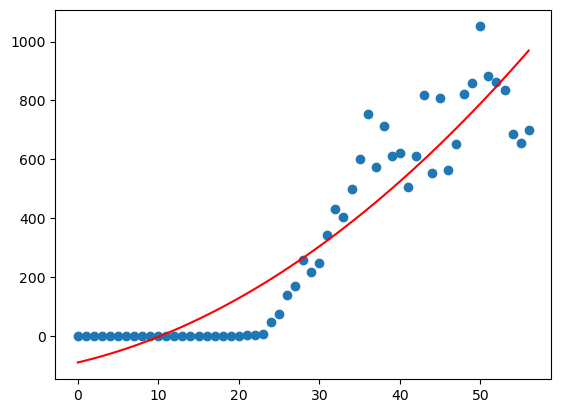

In [29]:
#Apply squared function 
X = mar['index']
X = pd.concat([X, X**2], axis=1)
X = sm.add_constant(X)
y = mar['Cas confirmés']

est = sm.OLS(y,X).fit()

Xfit = pd.DataFrame(np.linspace(0, X.iloc[:,1].max(),len(X)))
Xfit = pd.concat([Xfit, Xfit**2], axis=1)
Xfit = sm.add_constant(Xfit)


yfit = est.predict(Xfit)

plt.scatter(X.iloc[:,1], y)
plt.plot(Xfit.iloc[:,1], yfit, color='red')

est.summary()

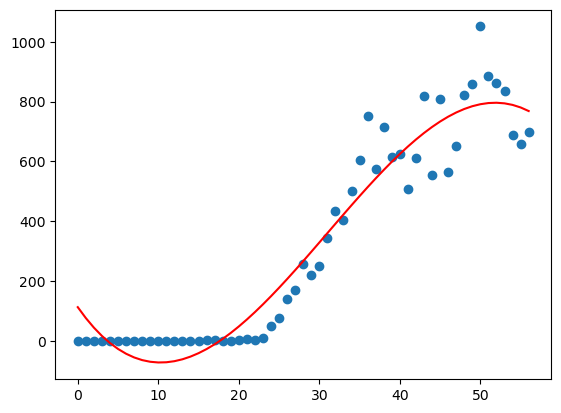

In [24]:
#combine cube & squared function 
X = mar['index']
X = pd.concat([X, X**2,X**3], axis=1)
X = sm.add_constant(X)
y = mar['Cas confirmés']

est = sm.OLS(y,X).fit()

Xfit = pd.DataFrame(np.linspace(0, X.iloc[:,1].max(),len(X)))
Xfit = pd.concat([Xfit, Xfit**2, Xfit**3], axis=1)
Xfit = sm.add_constant(Xfit)


yfit = est.predict(Xfit)

plt.scatter(X.iloc[:,1], y)
plt.plot(Xfit.iloc[:,1], yfit, color='red')

In [32]:
#create dataset for school opening AUG2020:
start_date = "2020-07-31"
end_date = "2020-09-30"

data = (covid['Date de résultat du test'] >= start_date) & (covid['Date de résultat du test'] <= end_date)
aug = covid.loc[data].reset_index()
aug['Day']=aug.index
aug = aug.drop('index',axis=1)
aug

,Date de résultat du test,Cas confirmés,Day
0,2020-07-31,123,0
1,2020-08-01,123,1
2,2020-08-02,102,2
3,2020-08-03,140,3
4,2020-08-04,148,4
...,...,...,...
57,2020-09-26,876,57
58,2020-09-27,922,58
59,2020-09-28,870,59
60,2020-09-29,975,60


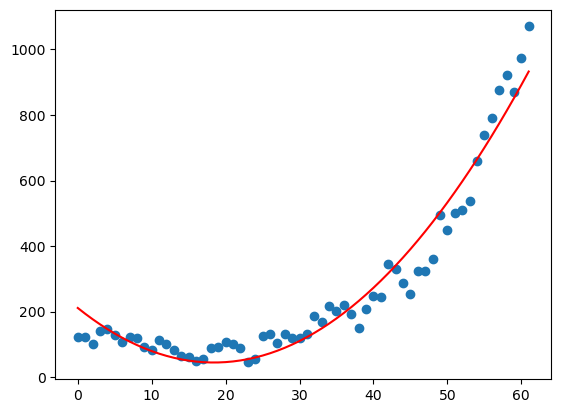

In [38]:
# squared function 
X = aug['Day']
X = pd.concat([X, X**2], axis=1)
X = sm.add_constant(X)
y = aug['Cas confirmés']

est = sm.OLS(y,X).fit()

Xfit = pd.DataFrame(np.linspace(0, X.iloc[:,1].max(),len(X)))
Xfit = pd.concat([Xfit, Xfit**2], axis=1)
Xfit = sm.add_constant(Xfit)


yfit = est.predict(Xfit)

plt.scatter(X.iloc[:,1], y)
plt.plot(Xfit.iloc[:,1], yfit, color='red')

In [34]:
#create dataset for 2nd lockdown DEC2020:
start_date = "2020-11-25"
end_date = "2021-01-25"

data = (covid['Date de résultat du test'] >= start_date) & (covid['Date de résultat du test'] <= end_date)
dec = covid.loc[data].reset_index()
dec['Day']=dec.index
dec = dec.drop('index',axis=1)
dec

,Date de résultat du test,Cas confirmés,Day
0,2020-11-25,1430,0
1,2020-11-26,1374,1
2,2020-11-27,1415,2
3,2020-11-28,1273,3
4,2020-11-29,1247,4
...,...,...,...
57,2021-01-21,1676,57
58,2021-01-22,1500,58
59,2021-01-23,1390,59
60,2021-01-24,1148,60


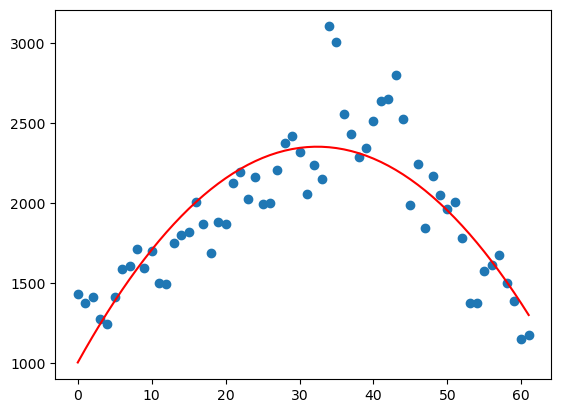

In [39]:
# squared function 
X = dec['Day']
X = pd.concat([X, X**2], axis=1)
X = sm.add_constant(X)
y = dec['Cas confirmés']

est = sm.OLS(y,X).fit()

Xfit = pd.DataFrame(np.linspace(0, X.iloc[:,1].max(),len(X)))
Xfit = pd.concat([Xfit, Xfit**2], axis=1)
Xfit = sm.add_constant(Xfit)


yfit = est.predict(Xfit)

plt.scatter(X.iloc[:,1], y)
plt.plot(Xfit.iloc[:,1], yfit, color='red')